In [1]:
import random
import numpy as np
import logging
import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
## turn back to main directory
os.chdir("../")
os.getcwd()

'/project/at082-group17'

In [3]:
mail = pd.read_csv('data/mail_data.csv')

In [4]:
## load 'article_cutted'
with open('data/mail_cutted', 'rb') as file:
    data = pickle.load(file)

In [5]:
newData = []
for i in data:
    s = ''
    for j in i:
        s = s + j + ' '
    newData.append(s)

In [6]:
tfidf = TfidfVectorizer()
cop_tfidf = tfidf.fit_transform(newData)
# 编码文档 
#vector = tfidf.transform([newData[1]])
weight = cop_tfidf.toarray()

In [7]:
weight

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [9]:
clf = KMeans(n_clusters=4)
s = clf.fit(weight)

In [10]:
with open('data/pickle/TFIDF_KMeans_Model.p', "wb") as file:
    pickle.dump(clf, file)

In [11]:
## load 'df_all_dum'
with open('data/pickle/TFIDF_KMeans_Model.p', "rb") as file:
    clf = pickle.load(file)

In [12]:
y_kmeans = clf.predict(weight)

In [13]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [14]:
# PCA降維,繪製三維圖
pca = PCA(n_components=3)
newWeight = pca.fit_transform(weight)

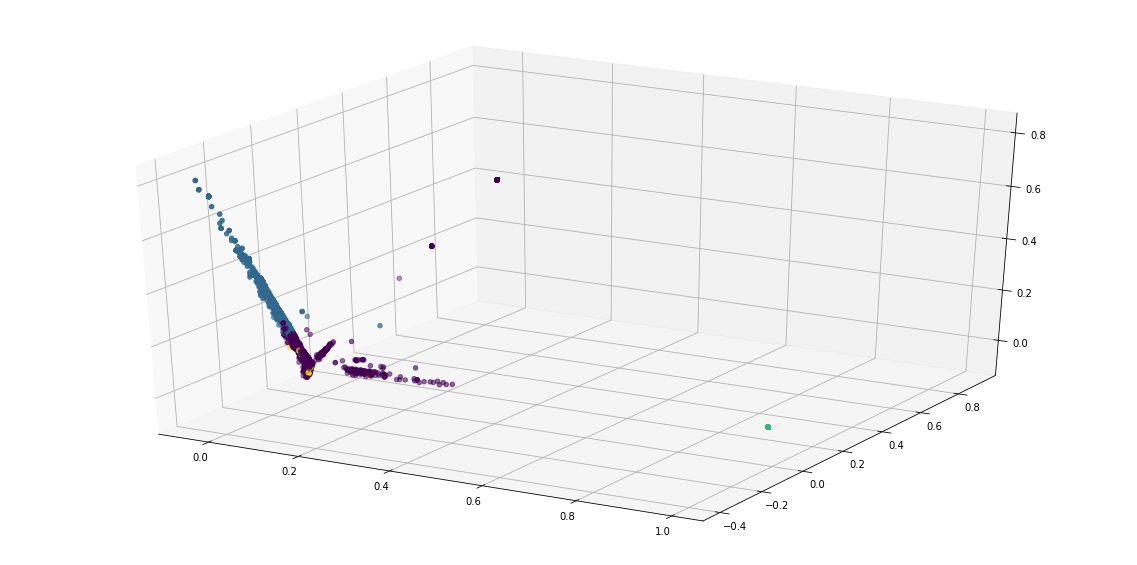

In [15]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(newWeight[:, 0],newWeight[:, 1],newWeight[:, 2],c=y_kmeans)
plt.show()

In [16]:
import jieba
import jieba.posseg as pseg

## set dictionary (can define yourself)
jieba.set_dictionary('AT082_17_Leopard_Read/jieba/dict.txt.big')
stop_words = open('AT082_17_Leopard_Read/jieba/stop_words.txt').read().splitlines()
jieba.load_userdict("AT082_17_Leopard_Read/jieba/userdict.txt") 

Building prefix dict from /project/at082-group17/AT082_17_Leopard_Read/jieba/dict.txt.big ...
Loading model from cache /tmp/jieba.u7a77d3d723a86361a2a598a9f10e1ebc.cache
Loading model cost 1.262 seconds.
Prefix dict has been built succesfully.


In [17]:
weightO = []
for i in range(len(mail['subject'])):
    weightO.append(jieba.lcut(mail['subject'][i]))
newDataO = []
for i in weightO:
    s = ''
    for j in i:
        s = s + j + ' '
    newDataO.append(s)
cop_tfidf_O = tfidf.transform(newDataO)
weight_V = cop_tfidf_O.toarray()
y_kmeans_O = clf.predict(weight_V)

In [18]:
weight_V.shape

(57279, 31575)

In [19]:
mail.shape

(57279, 5)

In [20]:
mail['mailType'] = y_kmeans_O

In [21]:
mail.head(100)

,campaignSn,fromName,fromMailAddress,subject,scheduledDate,mailType
0,000000005f59c23b015f73f2f5107a39,server,reptor0066@gmail.com,专属邀请函,2017-11-01 03:40:41,0
1,000000005f59c23b015f73f416917a5e,server,reptor0066@gmail.com,专属邀请函,2017-11-01 03:41:53,0
2,000000005f59c23b015f73f6d5207ac6,server,reptor0066@gmail.com,专属邀请函,2017-11-01 03:44:51,0
3,000000005f59c23b015f73f755077adc,server,reptor0066@gmail.com,专属邀请函,2017-11-01 03:45:27,0
4,000000005f59c23b015f710327035577,動腦每日報,askme@brain.com.tw,品牌遇母則強 媽媽經濟5大洞察︱iPhone X 銷售大預測【${random}】,2017-11-01 05:00:00,0
5,000000005f59c23b015f5b3da4dd1bd4,禾宸生醫國際有限公司,hcbi0985012885@gmail.com,『台灣原生 山芙蓉 修護保濕霜』立即體驗用品申請,2017-11-01 07:05:41,0
6,000000005f59c23b015f71d2723d78ff,鮮乳坊,service@ilovemilk.com.tw,【恭喜中獎】鮮乳坊FlyingV集資回饋問卷中獎通知,2017-11-01 08:00:00,0
7,000000005f59c23b015f74e9266313c6,財團法人台北行天宮附設玄空圖書館,epaper@ht.org.tw,．玄空圖書館電子報．106/11/01生活焦點資訊,2017-11-01 08:10:48,0
8,000000005f59c23b015f74edf4f014b3,真理大學進修推廣部,au1911@gmail.com,【真理大學終身學習課程-11、12月號】,2017-11-01 08:15:19,0
9,000000005f59c23b015f702e7e7c5651,暖暖幸福 ‧ MADEN地板,madenfloor@gmail.com,【單品魅力】11月~柚木藝術牆飾板,2017-11-01 08:42:01,0


In [22]:
mail.to_csv('data/mail_dataV2_cluster4.csv')